In [ ]:
# Your Name: Rishi

# Welcome to Folium
In this notebook, we'll be going over how to use the Folium package to visualize geographical data. Folium makes it easy to visualize data on a geographical map. If you've ever seen heat maps or maps with points or markers, they are completely possible to do on Python. In this workshop, we'll be exploring how to add `Markers and Points/Circles` onto maps, as well as creating `Heat Maps`, `Choropleth Maps`, and implementing `GeoJSON files` onto our maps (don't worry if you don't know what that means, we'll go over it in this workshop).

**Remember to** `make a copy of this Colab and save to your own drive and share the link with us (change to anyone who has the link can comment.`

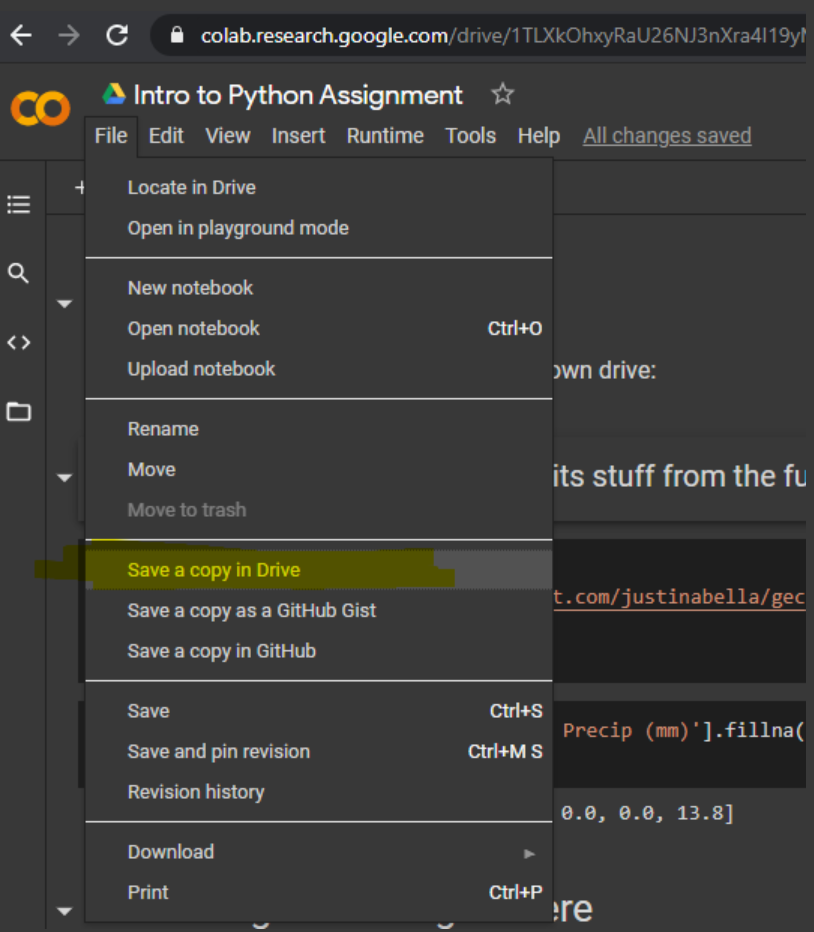

# Installing and Importing Modules
The first thing in every code, especially with a new library, is to import everything.

In [1]:
# If this is your first time opening this code, run this block.
!pip install geopandas

     |████████████████████████████████| 994 kB 22.2 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
     |████████████████████████████████| 6.6 MB 58.7 MB/s 


In [ ]:
# These are all the relevant packages we'll need to efficiently use Folium
import folium
from folium import plugins
import pandas as pd
import geopandas as gpd

**IMPORTANT**

If Google Colab is not recognizing geopandas, you will get an error saying so. In that case, uncomment the block of code above:

`!pip install geopandas`.

This is an error because the geopandas module is not installed in your personal Google Colab file and needs to be done manually. To uncomment, simply remove the `#` sign.

# The World Map
The first thing we can do with folium is to use the `Map` function. We are going to *define a variable* and call on the `Map` function.

In [ ]:
world_map = folium.Map()
world_map

The `Map` function can take in some arguments. Inside the brackets, we can put `location=[latitude,longitude]` and `zoom_start=` arguments. The `location` tells the map where to place the center and the `zoom_start` argument tells folium how zoomed in we want to be. **To find the latitude and longitude of a location, simply find it on Google.*

Let's zoom in onto the `University of Toronto`.

**REMEMBER:** N and E are positive. S and W are negative. On Google, you will see the coordinates for UofT as 43N and 79W. This equates to [43, -79].
Try to see what happens when you change the -79 to a positive.

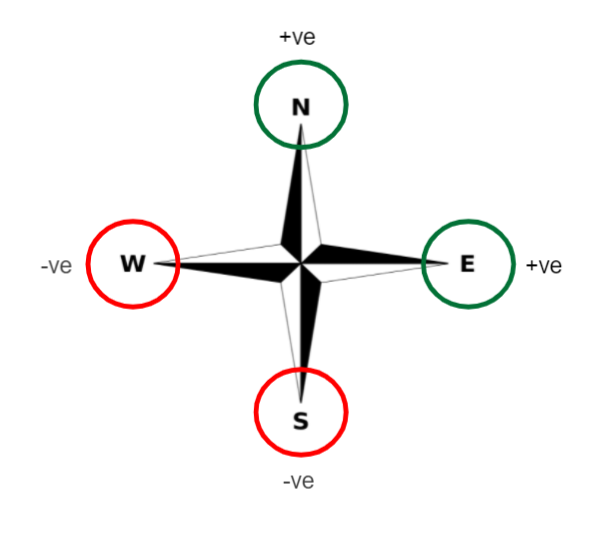

In [ ]:
uoft_map = folium.Map(location=[43.6629, -79.3957], zoom_start=16)
uoft_map

# Adding Markers
Folium allows us to add markers onto a map. All we need, again, are the locations in `latitude and longitude.` Using what we learned in **object oriented programming,* we can call on `folium.Marker`.

We also see a new method in the form of `add_to(map)`, seen on the end of the code. This `add_to` method simply takes whatever it is you want to add and places it onto your map (the variable name inside of the brackets).

Let's add some of the **world capitals** to the `world_map`.

In [ ]:
# Capital of France
folium.Marker(location=[48.8566, 2.3522], popup='Paris').add_to(world_map)
 
# Capital of India
folium.Marker(location=[28.7041, 77.1025], popup='New Delhi').add_to(world_map)
 
# Capital of China
folium.Marker(location=[39.9042, 116.4074], popup='Beijing').add_to(world_map)
 
# Capital of Russia
folium.Marker(location=[55.7558, 37.6173], popup='Moscow').add_to(world_map)
 
# Capital of Canada
folium.Marker(location=[45.4215, -75.6972], popup='Ottawa').add_to(world_map)
 
# Capital of Argentina
folium.Marker(location=[-34.6037, -58.3816], popup='Buenos Aires').add_to(world_map)
 
# Capital of Nigeria
folium.Marker(location=[9.05785, 7.49508], popup='Abuja').add_to(world_map)
 
world_map

# Importing Data from Dataframes
Dataframes is a powerful tool if you recall. Folium likes to use data from Dataframes and use them onto the maps. In this section, we're going to learn how to use data from dataframes and implement that into a folium map.

The following example will be combining a new method, `CircleMaker`, with reading a dataframe, using a `for loop`. This will all make sense as you continue down this example.

First thing we need to do is to implement the data.

In [ ]:
canadian_city_data = 'https://raw.githubusercontent.com/justinabella/gecsummer2021/main/Canadian%20Cities.csv'
canada_df = pd.read_csv(canadian_city_data, encoding='ISO-8859-1')
 
# In case you were wondering what the encoding part is, in a nutshell, 
# it makes it so that the code can read special characters like accents.
# If it didn't have this, the code would end in an error.
 
canada_df.head(10)

,City,Latitude,Longitude
0,"Yorkton, SK, Canada",51.213890,-102.462776
1,"Warman, SK, Canada",52.321945,-106.584167
2,"Swift Current, SK, Canada",50.288055,-107.793892
3,"North Battleford, SK, Canada",52.757500,-108.286110
4,"Moose Jaw, SK, Canada",50.393333,-105.551941
5,"Melville, SK, Canada",50.930557,-102.807777
6,"Melfort, SK, Canada",52.856388,-104.610001
7,"Martensville, SK, Canada",52.289722,-106.666664
8,"Humboldt, SK, Canada",52.201942,-105.123055
9,"Lloydminster, SK, Canada",53.278046,-110.005470


In [ ]:
# Let's make a new map of Canada
canada_map = folium.Map(location=[60.1304, -98.3468], zoom_start=3)
canada_map

# Adding Circle Markers
The next section of the code uses a for loop that goes through each of the rows in the dataframe, takes the latitude and longitude, and plots it onto the map. Note the `add_to(map)` function.

You will notice that there is a new `CircleMaker` method here. This is just like the `Marker` method we learned in the previous section. It is another layer that we can add onto our map. This function just adds circles onto our map. There are several arguments that the `CircleMaker` method takes. In the example below, we have arguments like `radius`, `popup`, and `fill_color`, which defines the length of the radius, the name of the circle, and the colour, respectively.

In [ ]:
for index, row in canada_df.iterrows():
  folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                      radius=1,
                      popup=row['City'],
                      fill_color="#3db7e4", # divvy color
                      ).add_to(canada_map)
 
canada_map

# Heat Maps
The heat map is used to show the intensity of spots on a map. We will actually be building the heat map on top of the circle points we put onto the Canadian map. We want to see which locations in Canada is the most densely populated in terms of number of cities.

You will see the new function `plugins.Heatmap` below. This function needs to take in an array of latitude and longitude arguments. That is what the `canadian_cities` variable is used for. That variable takes the latitude and longitude values from the `canada_df` dataframe and turns it into an array, so that the `plugins.Heatmap` function can read it. Notice the arguments inside the heatmap. Lastly, we once again used the `add_to` method, adding the heatmap to the Canadian Map.

In [ ]:
# convert to (n, 2) nd-array format for heatmap
canadian_cities = canada_df[['Latitude', 'Longitude']].values
 
# plot heatmap
folium.plugins.HeatMap(canadian_cities, radius=16).add_to(canada_map)
 
# This LayerControl function just makes it so the heat map can be toggled.
# Check out the button on the top right hand side of the map when you run this code.
folium.LayerControl().add_to(canada_map)
 
canada_map

**IMPORTANT NOTE**

If you keep pressing on the heat map code above, it will **not** reset the map. Instead it will keep adding a layer to the map and increases its intensity. Look what happens when you run the heatmap code 5 or 6 times and notice how the colours are more intense. You are stacking a bunch of layers on top of each other.

We typically want to avoid this, so it's ideal that instead of running the block of code over and over again, I suggest going to the top bar and clicking on `Runtime`, then `Restart and run all` instead. This resets the map by running the empty Canada map all over again.

# GeoJSON Layers

For the last few concepts of the Folium module, we need to understand what `GeoJSON` layers are. In short, `GeoJSON` files are data files that represents `simple geographic features` on a map. It is a play on the term `JSON`, which is a JavaScript Object Notation. In other words, `GeoJSON` files are again, drawn in shapes/layers that we can add onto a map. These shapes typically take the form of counties, states, provinces, or territories on maps.

This would be more clear with an example. Let's add a `GeoJSON` file that draws in all the US states.

In [ ]:
# The following is a link to the GeoJSON file for the US states.
state_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

# Let's see what this data really is under a dataframe. We are using the geopandas module here
# In this exercise, we will be using Geopandas for turning geojson files into dataframes only.
geoJSON_df = gpd.read_file(state_geo)
geoJSON_df.head()

# Pay attention to the ID

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [ ]:
# Define the US map
usa_map = folium.Map(location=[48, -102], zoom_start=3)

# Add GeoJSON file to map
folium.GeoJson(state_geo, name='geojson states').add_to(usa_map)

usa_map

You can think of the original Folium Map as just a picture. There are no borders or shapes or anything that we can play around on with just the Folium map. This is why we need to continually add layers on top of the bare Folium map. Because we added the US states as an additional layer, we can differentiate the states with different data.

# Choropleth Maps
Choropleth maps are a type of map in which a set of pre-defined areas is colored or patterned in proportion to data. Each area represents a set of data and altogether, it paints a picture on how each of the different areas are related to one another. It provides an easy way to visualize how a variable varies across a geographical area or show variability within a region.

In the final example below, we are going to see what the unemployment rate is between the different US states.

In [ ]:
geoJSON_df.head()

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [ ]:
state_unemployment = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

state_data.head(10)

# Remember the ID from the geojson dataframe above? 
# We are using that ID and this State column to connect the two data into one map

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [ ]:
# Let's reset the USA map
usa_map = folium.Map(location=[48, -102], zoom_start=3) 
 
folium.Choropleth(
    geo_data=state_geo,                     # Gives state map
    name="choropleth",                      # Gives a name to the map
    data=state_data,                        # Gives unemployment data per state
    columns=["State", "Unemployment"],      # Matches the data... columns = [what is common between our two dfs, actual data]
    key_on="feature.properties.id",         # Binds the two data together (geo and unemployment) (Try properties if it's grey)
    fill_color="YlGn",                      # Setting the colors of the map
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",    # Legend name
    highlight = True                        # Allows users to zoom in onto each state on the map
    ).add_to(usa_map)
 
folium.LayerControl().add_to(usa_map)
usa_map

# MANDATORY EXERCISES
Here are the compilations of exercises of all the concepts we learned in today's class. Work through this to gain a better understanding of all of the methods:

## Exercise 1
Create three maps with a zoom of 15 or higher, centered around the following three places:

a) The Eiffel Tower

b) Mount Everest

c) The Great Barrier Reef

*Remember, you can find the latutude and longitudes on Google. Don't forget the positives (N and E) and negatives (S and W).*

In [ ]:
# Write your code here.

# -------------------
# The Eiffel Tower

# Mount Everest


# Great Barrier Reef

# -------------------

## Exercise 2
Add the following `capital city markers` to the `world_map`:

The Capital City of... 

a) USA 

b) Japan     

c) Egypt

d) Australia

e) Brazil

f) Italy


In [ ]:
# Write your code here.
world_map

# -------------------
# Capital of USA

# Capital of Japan

# Capital of Egypt

# Capital of Australia

# Capital of Brazil

# Capital of Italy

# -------------------

## Exercise 3
We learned how to read .csv files and put them into a Dataframe. We also learned how to use Markers. In this exercise, we are building off of Exercise 2. Using the following link, **place new circles** of all the world's capitals onto the `world_map`. It's up to you if you want to add to the existing map or make a new variable.

In [ ]:
world_capital_url = 'https://raw.githubusercontent.com/justinabella/gecsummer2021/main/worldcapitals.csv'
capital_df = pd.read_csv(world_capital_url, encoding='ISO-8859-1')  # This encoding part allows pandas to read special characters
capital_df.head()

world_map = folium.Map()

# Write your code here.

# -------------------

# Hint: Use a for loop to go through the dataframe and add the circle points in. 
# Pay attention to the column names. We need to be accurate for the location argument.




# -------------------

## Exercise 4
With the following link (containing USA city data), create a heat map, similar to the one that was made with Canada earlier. Make a new variable name so that it does not overwrite anything.

In [ ]:
usa_city_data = 'https://raw.githubusercontent.com/justinabella/gecsummer2021/main/USA%20Cities.csv'

# Step 1: Define your dataframe


# Write your code here.

# -------------------
# A heat map works with a defined set of circles, so like in Exercise 3, we need to place these circles onto the map.

# Step 2: Define your Map


# Step 3: Put in your CircleMarkers




# Step 4: Turn your Latitudes and Longitudes into an array, using .values



# Step 5: Use folium.plugins.HeatMap to add to the map



# -------------------

# Closing Remarks
And that's about all we'll be learning with `Folium` for this class. You will be using these concepts with your projects. Hopefully this workshop will guide you through the basic concepts on how to use the `Folium` module. If you have any questions, please don't hesitate to reach out to your instructors. Good luck with your projects!